## Datan analysointi ja Visualisointi - Tehtävät kerta 5

**Opiskelijan nimi (opisk.nro.): TÄHÄN_OMA_NIMESI (OP.NRO.)**

**Harjoituskerran 5** tehtävistä palautetaan omaan repositoryyn muodossa **harjoitus5_etunimi_sukunimi_opiskelijanumero.ipynb**.
Kyseessä on siis opiskelijan **Private repository**, johon tarkastuksen ajaksi on lisätty opettaja **Developer**-oikeuksilla.
Jokaiseen vastattuun tehtävään tulee ajaa niiden ratkaisut näkyville (Output-kentät näkyvät suoraan) palautettavaan Jupyter Notebook -tiedostoon. Tehtäväsi arvioidaan seuraavasti:

* **1,0 p**. Vastaus on täysin oikein.
* **0,5 p**. Vastaus on osittain oikein.
* **0 p**. Vastaus on väärin.

**Tehtävissä ei tule käyttää silmukkarakenteita.** Sen sijaan tämän harjoituksen tehtävät kirjoitetaan ilman funktiorakennetta (skripti-muodossa). Ratkaisusi on täysin oikein, jos saat saman kuvan kuin esimerkkivastauksessa.

Tässä pitää valita oman kiinnostuksen mukaan palauttaako harjoituksen **2 a) vai 2 b)** - molempia harjoituksia ei siis voi palauttaa. **Maksimipistemäärä** harjoituksista on siis aiempaan tapaan **5** pistettä.


## 1. Säädatan esittäminen

Esitetään säädataa, joka on ladattu [Ilmatieteen laitoksen WFS rajapintapalvelusta](https://www.ilmatieteenlaitos.fi/latauspalvelun-pikaohje). Ennen säädatan esittämistä se tulee käsitellä seuraavasti:
* lataa data DataFrameen url:sta 'https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/saatiedot.csv' ottaen huomioon sarakkeiden erotinmerkin ',' ja desimaalierottimen '.',
* datan ensimmäisessä sarakkeessa (tai indeksissä) on esitetty aika muodossa **vuosi-kuukausi-päivä tunnit:minuutit:sekunnit**,
* muodosta em. aika sarakkeen kaikkia kenttiä (päivämäärä ja kellonkaika) hyödyntämällä uuteen DataFrameen sarake `'aika, s'`, joka kertoo kuinka paljon aikaa on kulunut sekunteina ensimmäisestä mittaushavainnosta eteenpäin,
* lisää uuteen DataFrameen sarake `'Air temperature, degC'`,
* tulosta tekemästäsi em. DataFramesta viisi ensimmäistä riviä.

Kun olet käsitellyt datan, tee xy - tasolle seuraavanlainen kuvaaja:
* aika sarakkeesta `'aika, s'` on esitetty vaaka-akselilla ja ilman lämpötila sarakkeesta `'Air temperature, degC'` on esitetty pystyakselilla,
* em. kuvaajassa datapisteitä on merkitty punaisella pisteellä,
* punaista pistettä esittävälle datalle on merkitty selite (*legend*), jossa lukee `'ilman lämpötila'`,
* vaaka-akelin otsikoksi on kirjoitettu `'aika, s'` ja pystyakselin otsikoksi 'ilman lämpötila $^{o}C$ ',
* huomaa, että akselin otsikkoon voit merkitä fysikaalisen yksikön [TeX syntaksilla](https://en.wikipedia.org/wiki/TeX),
* lisää kuvaajaan myös ruudukko, jossa on musta katkoviiva.

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/tehtava1.png" width="450"/>


,"aika, s","Air temperature, degC"
0,0,6.5
1,600,6.2
2,1200,5.7
3,1800,5.7
4,2400,5.7


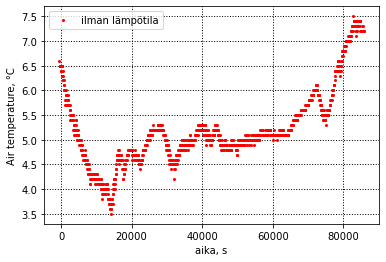

In [13]:
import pandas as pd
import numpy as np
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

url='https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/saatiedot.csv'
df = pd.read_csv(url,delimiter=",",decimal=".") 

#df['datetime']=pd.to_datetime(df['Unnamed: 0'],  format = '%Y-%d-%m %H:%M:%S')
'''
df['date'] = pd.to_datetime(df['Unnamed: 0'])

epoch_time = datetime(1970, 1, 1)
startTime=(df['date'][0:1]-epoch_time).dt.total_seconds().values

df2 = pd.DataFrame()
df2['aika, s']=(df['date']-epoch_time).dt.total_seconds()-startTime
df2['aika, s']=df2['aika, s'].astype(int)
df2['Air temperature, degC']=df['Air temperature, degC']
display(df2[:5])
'''


epoch_time = datetime(1970, 1, 1)


df2 = pd.DataFrame()
df2['aika, s'] = pd.to_datetime(df['Unnamed: 0'])
startTime=(df2['aika, s'][0:1]-epoch_time).dt.total_seconds().values
df2['aika, s']=(df2['aika, s']-epoch_time).dt.total_seconds()-startTime
df2['aika, s']=df2['aika, s'].astype(int)
df2['Air temperature, degC']=df['Air temperature, degC']
display(df2[:5])



X = df2['aika, s']
Y = df2['Air temperature, degC']
plt.plot(X, Y, 'o', color = 'red',markersize=2)
plt.grid(True)
plt.rc('grid', linestyle=':', color='black', linewidth=1)
plt.legend(['ilman lämpötila'])
plt.xlabel('aika, s')
plt.ylabel('Air temperature, \xb0C')
plt.show()

## 2. Vaihtoehto a) Säädatan esittäminen (2)

Esitetään säädataa, joka on ladattu [Ilmatieteen laitoksen WFS rajapintapalvelusta](https://www.ilmatieteenlaitos.fi/latauspalvelun-pikaohje). Ennen säädatan esittämistä se tulee käsitellä seuraavasti:
* lataa data DataFrameen url:sta 'https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/saatiedot.csv' ottaen huomioon sarakkeiden erotinmerkin ',' ja desimaalierottimen '.',
* datan ensimmäisessä sarakkeessa (tai indeksissä) on esitetty aika muodossa **vuosi-kuukausi-päivä tunnit:minuutit:sekunnit**,
* muodosta em. aika-sarakkeen kaikkia kenttiä (päivämäärä ja kellonkaika) hyödyntämällä uuteen DataFrameen sarake `'aika, s'`, joka kertoo kuinka paljon aikaa on kulunut sekunteina ensimmäisestä mittaushavainnosta eteenpäin,
* lisää uuteen DataFrameen sarakkeet `'Air temperature, degC'` ja `'Wind speed, m/s'`,
* tulosta tekemästäsi em. DataFramesta viisi ensimmäistä riviä.

Kun olet käsitellyt datan, tee xy - tasolle seuraavanlainen kuvaaja:
* aika sarakkeesta `'aika, s'` on esitetty vaaka-akselilla ja ilman lämpötila sarakkeesta 'Air temperature, degC' on esitetty vasemman puoleisella pystyakselilla ja tuulen nopeus sarakkeesta `'Wind speed, m/s'` on esitetty oikean puoleisella pystyakselilla,
* em. kuvaajassa datapisteitä (`'aika, s','Air temperature, degC'`) on merkitty punaisella pisteellä ja datapisteitä (`'aika, s','Wind speed, m/s'`) on merkitty sinisellä pisteellä,
* datapisteiden (`'aika, s','Air temperature, degC'`) selite *'ilman lämpötila'* (*legend*) on esitetty kuvassa oikealla alhaalla,
* datapisteiden (`'aika, s','Wind speed, m/s'`) selite *'tuulen nopeus'* (legend) on esitetty kuvassa vasemmalla ylhäällä,
* x-akselilla on esitetty aika yksiköissä $\cdot 10^{3}$ s ja x-akselin otsikko on 'aika, $\cdot 10^{3}$ s',
* vasemman puoleisen y-akselin otsikkona on 'ilman lämpötila, $^{o}C$',
* oikean puoleisen y-akselin otsikkona on `'tuulen nopeus, m/s'`,
* muuta x-akselin asteikkojaotus esimerkkikuvan kaltaiseksi,
* lisää kuvaajaan ruudukko, jossa on musta katkoviiva,
* aseta kuvan taustan väriksi (RGB) **'#D7F8FF'**,
* aseta kuvan otsikoksi *'Säätila Jyväskylän lentoasemalla'*.

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/tehtava2.png" width="450"/>

## 2. Vaihtoehto b) Valioliigan sarjataulukko (1)

Esitetään valioliigadataa:
* lataa data DataFrameen url:sta 'url = "https://student.labranet.jamk.fi/~pelju/data_av/samples/premium_league_2018_19/england-premier-league-teams-2018-to-2019-stats.csv"

Esitetään valittujen valioliigajoukkueiden koti- ja vierasvoitot samassa pylväsdiagrammissa. Ennen datan esittämistä se pitää käsitellä seuraavasti:
* lataa data DataFrameen tehtävästä annetusta url-osoitteesta
* lisää uuteen DataFrameen sarakkeet `common_name`, `wins_home` (kotipelien voitot) ja `wins_away` (vieraspelien voitot).
* valitse DataFrameen seuraavat joukkueet (`common_name`-sarakkeesta): `` 'Arsenal', 'Tottenham Hotspur', 'Manchester City', 'Manchester United', 'Chelsea', 'Liverpool', 'Everton' ``

* Lyhennä joukkueiden nimet kuvaajaa varten tekemällä uusi sarake *short_name*: `` 'Arsenal', 'Tottenham', 'ManCity', 'ManU', 'Chelsea', 'Liverpool', 'Everton' ``
* Tee uusi DataFrame käyttäen *df.melt(id_vars, var_name, value_name ...)*-metodia, johon tulee uudet sarakkeet `Win Type` ja `Wins`
```
   short_name   Win Type  Wins
0     Arsenal  wins_home    14
::::::::::::::::::::::::::::::
7     Arsenal  wins_away     7
```

* Kun olet käsitellyt datan, piirrä **(x,y)**-tasolle pylväsdiagrammi, jossa *x-akselilla* on joukkueen lyhennetty nimi ja *y-akselilla* on sekä kotivoittojen (`wins_home`) että vierasvoittojen lukumäärä (`wins_away`):
* aseta y-akselin pylväille myös selite (engl. *Legend*)
* käännä x-akselin otsikoita 30 astetta (vinkki: *xticks*)
* aseta kuvalle otsikko (*Title*)


**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~pelju/datanav_k22/topic5/h5_t2.png" width="450"/>


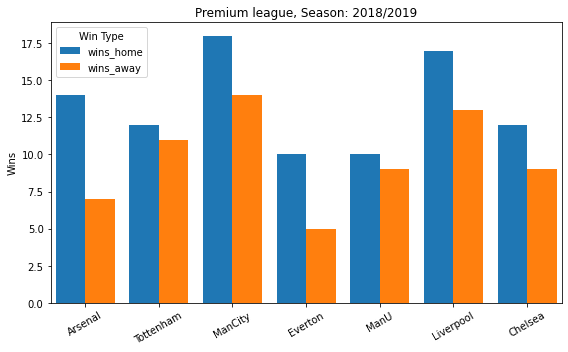

In [60]:
import pandas as pd
import numpy as np
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt


url = "https://student.labranet.jamk.fi/~pelju/data_av/samples/premium_league_2018_19/england-premier-league-teams-2018-to-2019-stats.csv"
df = pd.read_csv(url,delimiter=",",decimal=".") 

df2 = pd.DataFrame(columns=['common_name','wins_home','wins_away'])

#df2['common_name']=df.loc[df['common_name'].isin(['Arsenal','Tottenham Hotspur','Manchester City','Manchester United','Chelsea','Liverpool','Everton'])]

df2=df.loc[df['common_name'].isin(['Arsenal','Tottenham Hotspur','Manchester City','Manchester United','Chelsea','Liverpool','Everton'])]
#print(df2)
#print("-------------------------------")
shortNames=['Arsenal', 'Tottenham', 'ManCity','Everton','ManU','Liverpool','Chelsea']
df2.insert(len(df2.columns), 'short_name', shortNames, True)

#print(df2[['short_name','wins_home']])

winTypes=['wins_home','wins_away']

df2=df2.melt(id_vars =['short_name'] ,var_name ='Win Type', value_name='Wins',value_vars=winTypes,ignore_index=True)
#print(df2['Wins'])

winsHome=df2.loc[df2['Win Type']==winTypes[0]]['Wins'].tolist()
#print(winsHome)
#print("-------------------")
winsAway=df2.loc[df2['Win Type']==winTypes[1]]['Wins'].tolist()
#print(winsAway)

#print(df2)

'''
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
'''


labels = shortNames 
#print(labels)
#men_means = winsHome
#women_means = winsAway

#print(winsHome


x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(8,5))
#ax.bar(x - width/4, winsHome, width)
#ax.bar(x + width/4, winsAway, width)

ax.bar(x - width/2, winsHome, width)
ax.bar(x + width/2, winsAway, width)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Wins')
ax.set_title('Premium league, Season: 2018/2019')
#ax.set_xticks(x, labels)
ax.set_xticks(x);
ax.set_xticklabels(labels)
plt.xticks(rotation = 30)
ax.legend(title='Win Type',loc='upper left',labels=['wins_home','wins_away'])

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

#plt.figure(figsize=(30,4))
#ax.axes.set_xlim(1,2)
#fig.figsize=(10,4)
ax.margins(x=0.01)
fig.tight_layout()


plt.show()


## 3. Valioliigan sarjataulukko (2)

Esitetään valioliigadataa:
* lataa data DataFrameen url:sta 'url = "https://student.labranet.jamk.fi/~pelju/data_av/samples/premium_league_2018_19/england-premier-league-teams-2018-to-2019-stats.csv"

Esitetään valittujen valioliigajoukkueiden koti- ja vierasvoitot samassa pylväsdiagrammissa. Ennen datan esittämistä se pitää käsitellä seuraavasti:
* lataa data DataFrameen tehtävässä annetusta url:sta
* lisää uuteen DataFrameen sarakkeet `team_name, common_name, season, wins, draws` ja `losses`.
* valitse DataFrameen seuraavat joukkueet (`common_name`): ``'Arsenal', 'Tottenham Hotspur', 'Manchester City', 'Manchester United', 'Chelsea', 'Liverpool', 'Everton'``
* Lyhennä joukkueiden nimet kuvaajaa varten tekemällä uusi sarake *short_name*: ``'Arsenal', 'Tottenham', 'ManCity', 'ManU', 'Chelsea', 'Liverpool', 'Everton'``
* Lisää dataframeen kokonaan uusi sarake `points` (*pisteet*), jonka laskukaava on ``voitot * 3 + tasapelit`` (tappioista saa nolla pistettä): eli ``'wins' * 3 + 'draws'``

Kun olet käsitellyt datan, tee (`x,y`)-tasolle käännetty pylväsdiagrammi, jossa *y*-akselilla on joukkueen lyhennetty nimi ja
*x*-akselilla on joukkueen keräämät pisteet:
* pyri kääntämään *y*-akselin otsikoita 30 astetta (vinkki: `plt.yticks()`)
* aseta *y*-akselin pylväille myös otsikko, johon haet tiedot kaudesta (`season`) ja pelien määrästä (`matches_played`) alkuperäisestä DataFramesta
* lisää kuvaan myös ruudukko (vinkki: *grid*)

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~pelju/datanav_k22/topic5/h5_t3.png" width="450"/>


## 4. Autodatan esittäminen

#### Datan esikäsittely

Lataa data DataFrameen URL-osoitteesta: https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/autot.csv, kun olet huomioinut sarakkeiden erotinmerkit `'\t'`.
Tallenna uuteen DataFrameen vain ne rivit, joissa autonvalmistajalla (sarake `Mh`) on enemmän kuin 50 autoa. Muuta uudessa DataFramessa sarakkeen `Ft` merkkijonojen '*DIESEL*' tilalle '*Diesel*' ja '*PETROL*' tilalle '*Petrol*'. Jos sarakkeessa `Ft` on merkkijono '*NG*'*, korvaa se merkkijonolla '*Natural gas*'.

#### Datan visualisointi

Tee esimerkkikuvan kaltainen kuvaaja, jossa hyödynnät tuottamasi DataFramen sarakkeita autojen polttoainetyypin `Ft` ja auton valmistajan `Mh` osalta.

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/tehtava3.png" width="500"/>

## 5. Autodatan esittäminen (2)

#### Datan esikäsittely

Lataa data DataFrameen [url:sta](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/autot.csv), kun olet huomioinut sarakkeiden erotinmerkit '\t'. Tallenna uuteen DataFrameen vain ne rivit, joissa autonvalmistajalla (sarake **Mh**) on enemmän kuin 50 autoa ja sarakkeessa **Enedc (g/km)** on nollaa suurempia arvoja.

#### Datan visualisointi

Tee esimerkkikuvan kaltainen histogrammi, josta käy ilmi $CO_2$ päästöjen (sarake **Enedc (g/km)**) jakautuminen 100 eri lukualuevälin mukaan sekä kumulatiivinen histogrammi $CO_2$ päästöistä (sarake **Enedc (g/km)**). Otathan huomioon logaritmisen asteikon todennäköisyystiheysjakaumille.

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/tehtava4.png" width="500"/>
